In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

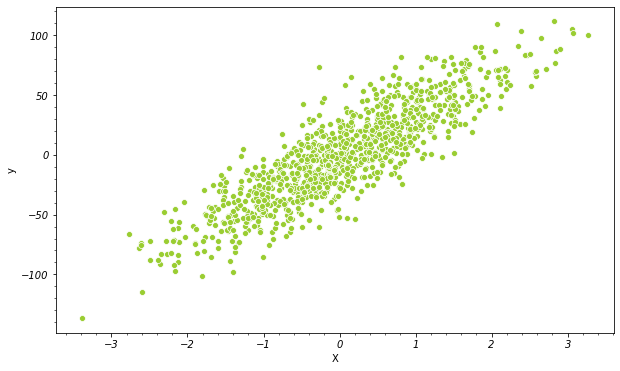

In [4]:
X, y, coef = make_regression(n_samples=1000,n_features=1,n_informative=1, noise=20,coef=True, \
                random_state=22)

X_df = pd.DataFrame(X,columns=['X'])
y_df = pd.DataFrame(y,columns=['y'])

data_df = pd.concat([X_df,y_df],axis=1)

plt.figure(figsize=(10,6))
sns.scatterplot(x=data_df['X'],y=data_df['y'],color='yellowgreen')
plt.minorticks_on()
plt.xlabel("X")
plt.ylabel("y")
plt.xticks(style='oblique',color='k')
plt.yticks(style='oblique',color='k')
plt.show()

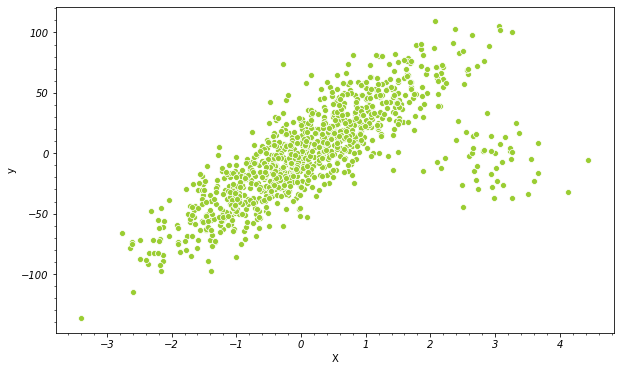

In [5]:
# Introduce some outliers on the existing dataset
np.random.seed(12)

# Number of outliers
n_outliers = 50;val=3;mul_val1=0.5;mul_val2=20

data_df['X'].iloc[0:n_outliers] = val + mul_val1 * np.random.normal(size=n_outliers)
data_df['y'].iloc[0:n_outliers] = -val + mul_val2 * np.random.normal(size=n_outliers)

plt.figure(figsize=(10,6))
sns.scatterplot(data_df['X'],data_df['y'],color='yellowgreen')
plt.minorticks_on()
plt.xlabel("X")
plt.ylabel("y")
plt.xticks(style='oblique',color='k')
plt.yticks(style='oblique',color='k')
plt.show()

In [6]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2,tol=0.001,max_iter=500,fit_intercept=True,solver='saga',random_state=23)
ridge.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=2,tol =0.00001,max_iter=1000,fit_intercept=True,selection='cyclic',random_state=23)
lasso.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

Lasso(alpha=2, random_state=23, tol=1e-05)

In [7]:
'''
# Applying RANSAC on a less noisy dataset
# case 1
    - RANSAC Estimator — Linear Regression
    - Min_samples = 50
    - Max_trials = 1000
    - Loss = Absolute Loss
    - Residual_threshold


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-7-28a85078f306>, line 8)

Linear Regression Coefficeint: [[23.0835977]]
RANSAC Regression Coefficeint: [[33.07503633]]


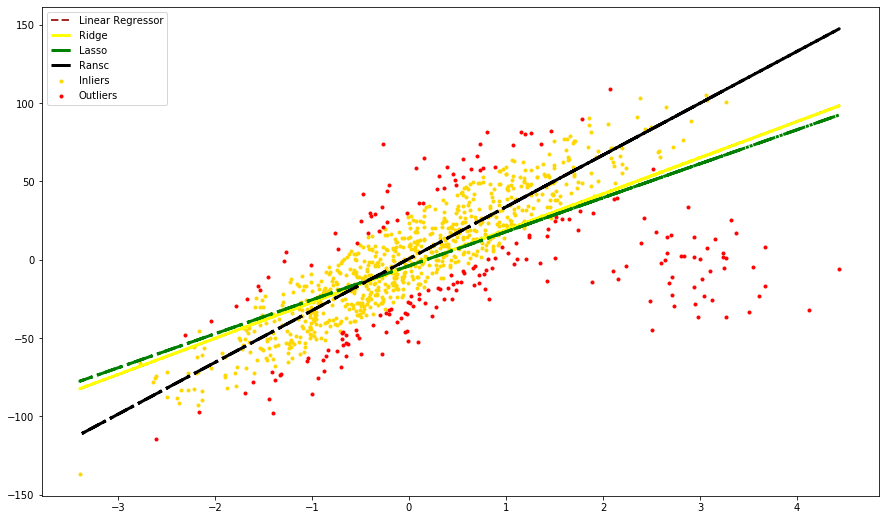

In [8]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

ransac = RANSACRegressor(base_estimator=LinearRegression(),min_samples=50, max_trials=1000,loss='absolute_loss')

ransac.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Comparing Linear and RANSAC Coeff
print("Linear Regression Coefficeint:",lr.coef_)
print("RANSAC Regression Coefficeint:",ransac.estimator_.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Plotting the Inliers
plt.scatter(data_df['X'][inlier_mask], data_df['y'][inlier_mask], color='gold', marker='.',label='Inliers')

# Plotting the Outlier
plt.scatter(data_df['X'][outlier_mask], data_df['y'][outlier_mask],color='red', marker='.',label='Outliers')

# Plotting the Linear Regression best-fit line
plt.plot(data_df['X'],lr.predict(data_df['X'].to_numpy().reshape(-1,1)), color='brown',linewidth='2', linestyle='--',\
        label='Linear Regressor')

# Plotting the Ridge Regression best-fit line
plt.plot(data_df['X'], ridge.predict(data_df['X'].to_numpy().reshape(-1,1)), color='yellow', linewidth=3, \
         linestyle='-.',label='Ridge')

# Plotting the Lasso Regression best-fit line
plt.plot(data_df['X'], lasso.predict(data_df['X'].to_numpy().reshape(-1,1)), color='green', linewidth=3, \
         linestyle='-.',label='Lasso')

# Plotting the Ransc Regression best-fit line
plt.plot(data_df['X'], ransac.predict(data_df['X'].to_numpy().reshape(-1,1)), color='black', linewidth=3, \
         linestyle='-.',label='Ransc')

plt.legend()


In [9]:
'''
# case 2
    RANSAC Estimator — Trained Ridge Regressor
    Min_samples = 50
    Max_trials = 500
    Loss = Absolute Loss

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-9-1d0a371a4c79>, line 6)

Linear Regression Coefficeint: [[23.0835977]]
RANSAC Regression Coefficeint: [[32.93080001]]


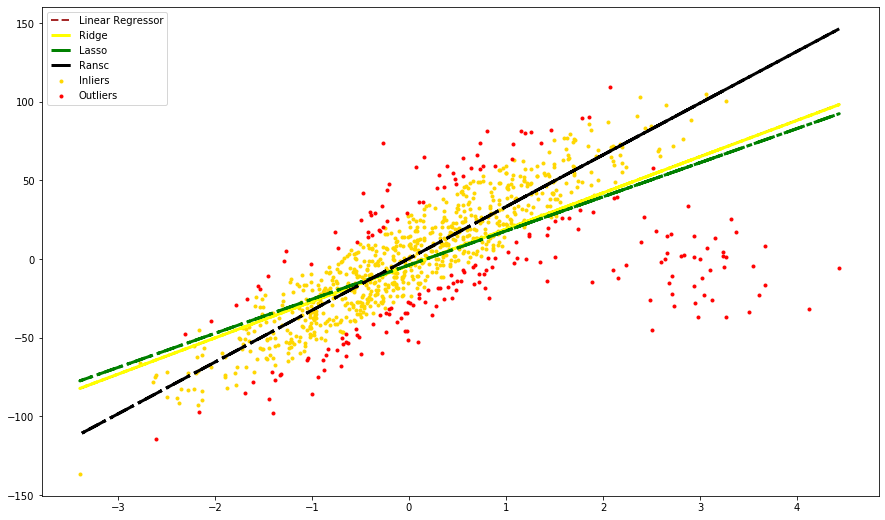

In [10]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

ransac = RANSACRegressor(base_estimator=ridge,min_samples=50, max_trials=500,loss='absolute_loss')

ransac.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Comparing Linear and RANSAC Coeff
print("Linear Regression Coefficeint:",lr.coef_)
print("RANSAC Regression Coefficeint:",ransac.estimator_.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Plotting the Inliers
plt.scatter(data_df['X'][inlier_mask], data_df['y'][inlier_mask], color='gold', marker='.',label='Inliers')

# Plotting the Outlier
plt.scatter(data_df['X'][outlier_mask], data_df['y'][outlier_mask],color='red', marker='.',label='Outliers')

# Plotting the Linear Regression best-fit line
plt.plot(data_df['X'],lr.predict(data_df['X'].to_numpy().reshape(-1,1)), color='brown',linewidth='2', linestyle='--',\
        label='Linear Regressor')

# Plotting the Ridge Regression best-fit line
plt.plot(data_df['X'], ridge.predict(data_df['X'].to_numpy().reshape(-1,1)), color='yellow', linewidth=3, \
         linestyle='-.',label='Ridge')

# Plotting the Lasso Regression best-fit line
plt.plot(data_df['X'], lasso.predict(data_df['X'].to_numpy().reshape(-1,1)), color='green', linewidth=3, \
         linestyle='-.',label='Lasso')

# Plotting the Ransc Regression best-fit line
plt.plot(data_df['X'], ransac.predict(data_df['X'].to_numpy().reshape(-1,1)), color='black', linewidth=3, \
         linestyle='-.',label='Ransc')

plt.legend()


In [11]:
'''
Case 3:
    RANSAC Estimator — Trained Lasso Regressor
    Min_samples = 50
    Max_trials = 500
    Loss = Squared Loss


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-11-5efb3ebe0df7>, line 6)

Linear Regression Coefficeint: [[23.0835977]]
RANSAC Regression Coefficeint: [0.]


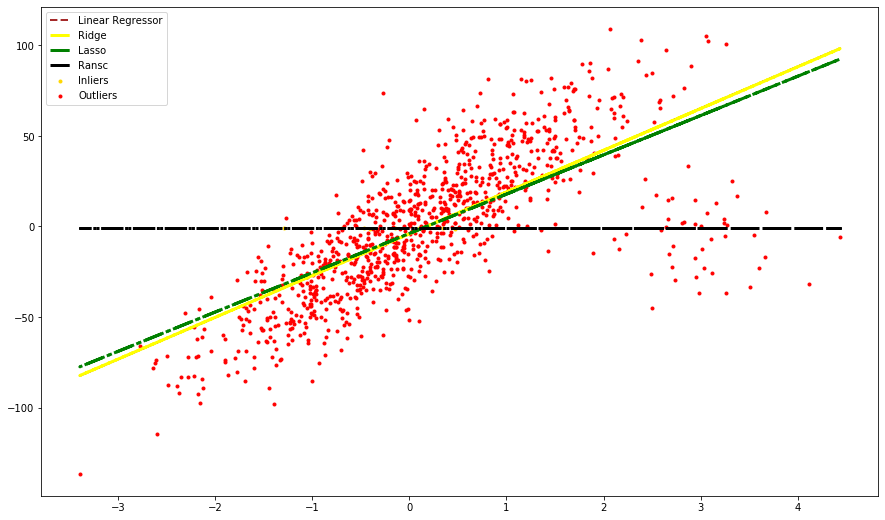

In [12]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

ransac = RANSACRegressor(base_estimator=lasso,min_samples=5, max_trials=500,loss='squared_loss')

ransac.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Comparing Linear and RANSAC Coeff
print("Linear Regression Coefficeint:",lr.coef_)
print("RANSAC Regression Coefficeint:",ransac.estimator_.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Plotting the Inliers
plt.scatter(data_df['X'][inlier_mask], data_df['y'][inlier_mask], color='gold', marker='.',label='Inliers')

# Plotting the Outlier
plt.scatter(data_df['X'][outlier_mask], data_df['y'][outlier_mask],color='red', marker='.',label='Outliers')

# Plotting the Linear Regression best-fit line
plt.plot(data_df['X'],lr.predict(data_df['X'].to_numpy().reshape(-1,1)), color='brown',linewidth='2', linestyle='--',\
        label='Linear Regressor')

# Plotting the Ridge Regression best-fit line
plt.plot(data_df['X'], ridge.predict(data_df['X'].to_numpy().reshape(-1,1)), color='yellow', linewidth=3, \
         linestyle='-.',label='Ridge')

# Plotting the Lasso Regression best-fit line
plt.plot(data_df['X'], lasso.predict(data_df['X'].to_numpy().reshape(-1,1)), color='green', linewidth=3, \
         linestyle='-.',label='Lasso')

# Plotting the Ransc Regression best-fit line
plt.plot(data_df['X'], ransac.predict(data_df['X'].to_numpy().reshape(-1,1)), color='black', linewidth=3, \
         linestyle='-.',label='Ransc')

plt.legend()


In [13]:
'''
Case 3:
    RANSAC Estimator — Trained Lasso Regressor
    Min_samples = 50
    Max_trials = 5
    Loss = Squared Loss


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-2f35062ac982>, line 6)

In [ ]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

ransac = RANSACRegressor(base_estimator=lasso,min_samples=5, max_trials=500,loss='squared_loss')

ransac.fit(data_df['X'].to_numpy().reshape(-1,1),data_df['y'].to_numpy().reshape(-1,1))

# Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Comparing Linear and RANSAC Coeff
print("Linear Regression Coefficeint:",lr.coef_)
print("RANSAC Regression Coefficeint:",ransac.estimator_.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))

# Plotting the Inliers
plt.scatter(data_df['X'][inlier_mask], data_df['y'][inlier_mask], color='gold', marker='.',label='Inliers')

# Plotting the Outlier
plt.scatter(data_df['X'][outlier_mask], data_df['y'][outlier_mask],color='red', marker='.',label='Outliers')

# Plotting the Linear Regression best-fit line
plt.plot(data_df['X'],lr.predict(data_df['X'].to_numpy().reshape(-1,1)), color='brown',linewidth='2', linestyle='--',\
        label='Linear Regressor')

# Plotting the Ridge Regression best-fit line
plt.plot(data_df['X'], ridge.predict(data_df['X'].to_numpy().reshape(-1,1)), color='yellow', linewidth=3, \
         linestyle='-.',label='Ridge')

# Plotting the Lasso Regression best-fit line
plt.plot(data_df['X'], lasso.predict(data_df['X'].to_numpy().reshape(-1,1)), color='green', linewidth=3, \
         linestyle='-.',label='Lasso')

# Plotting the Ransc Regression best-fit line
plt.plot(data_df['X'], ransac.predict(data_df['X'].to_numpy().reshape(-1,1)), color='black', linewidth=3, \
         linestyle='-.',label='Ransc')

plt.legend()


### Other Example

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
#
# Load the boston housing dataset
#
bhd = datasets.load_boston()
X = bhd.data
y = bhd.target
#
# Create the box plot
#
fig1, ax1 = plt.subplots()
ax1.set_title('Box plot for Housing Prices')
ax1.boxplot(y, vert=False)

In [16]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#
# Load the Boston Housing dataset for training
#
bhd = datasets.load_boston()
df = pd.DataFrame(bhd.data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = bhd.target
#
# Select Avg. No of rooms per dwelling as feature
# and fit the model
#
X = df['RM'].to_numpy().reshape(-1, 1)
y = df['MEDV'].to_numpy().reshape(-1, 1)
#
# Create an instance of RANSACRegressor
#
ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=50, max_trials=100,
                         loss='absolute_loss', random_state=42,
                         residual_threshold=10)
#
# Fit the model
#
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=42, residual_threshold=10)

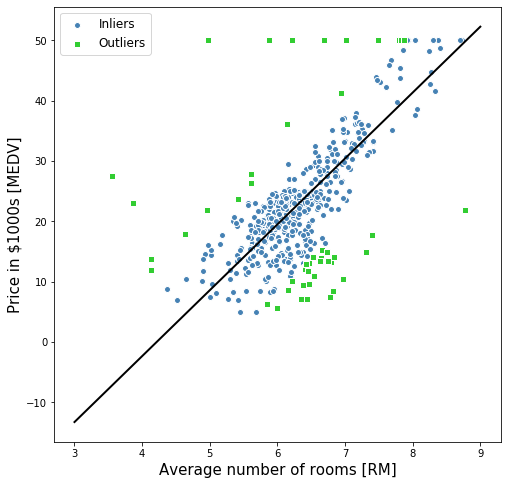

In [17]:
#
# Get the Inlier mask; Create outlier mask
#
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
#
# Create scatter plot for inlier datset
#
plt.figure(figsize=(8, 8))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
#
# Create scatter plot for outlier datset
#
plt.scatter(X[outlier_mask], y[outlier_mask],
             c='limegreen', edgecolor='white',
             marker='s', label='Outliers')
#
# Draw the best fit line
#
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]', fontsize=15)
plt.ylabel('Price in $1000s [MEDV]', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.show()